## Lab 2
Name: Pratyush Singh <br>
Class: Phys 434


In [11]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

### 1. A. 
For Part 1A, I chose the mean to be 3, and Y can be any number greater than that, so I chose Y = 4. In order to show how the probability distribution of the background changes as we integrate over more days, we convolve the Poisson distribution's pmf with itself n times to view the changes that occur. We can see how it flattens out as n increases.

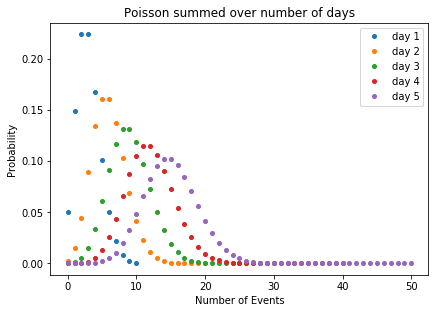

In [57]:
plt.subplots_adjust(top=1,right=1)
x1 = np.linspace(0,10,11)
probs = stats.poisson.pmf(x1, 3)
plt.plot(x1, probs, 'o', label='day 1',markersize =4)

cc = np.convolve(probs,probs)
x2 = np.linspace(0,20,21)
plt.plot(x2,cc, 'o', label = 'day 2', markersize =4)

conv2 = np.convolve(cc,probs)
x3 = np.linspace(0,30,31)
plt.plot(x3,conv2,'o', label = 'day 3', markersize =4)

conv3 = np.convolve(conv2,probs)
x4 = np.linspace(0,40,41)
plt.plot(x4,conv3,'o', label = 'day 4', markersize =4)

conv4 = np.convolve(conv3,probs)
x5 = np.linspace(0,50,51)
plt.plot(x5,conv4,'o', label = 'day 5', markersize =4)
plt.title('Poisson summed over number of days')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 1.B.
To check if it is still Poisson after 5 days, we convolve it 4 times. It is still Poisson which makes sense because the distribution counts the likelihood of N events over n=5 days, the counting of which is described by a Poisson distribution.


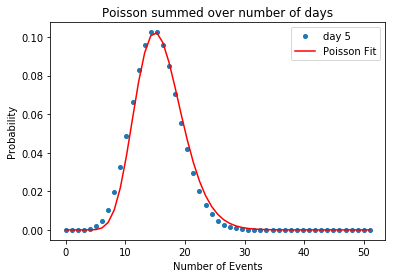

In [118]:
x5 = np.linspace(0,51,51)
plt.plot(x5,conv4,'o', label = 'day 5', markersize =4)
fit_poisson = stats.poisson.pmf(15,x5)
plt.plot(x5, fit_poisson, 'r-', label='Poisson Fit')
plt.title('Poisson summed over number of days')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()

plt.show()

## 1.C.
We want to average this time. We expect that any sum of identical Poisson variables will be Poisson, and a rescaling of it will then also be Poisson. We are effectively rescaling when taking the average here. As the number of days increase, we are convuluting more, which in turn gives us more points. As points increaase we should begin to see our distribution look more normal. We note that our plots support this prediction. This doesn't happen in B because the convolved pdfs are not normalized.

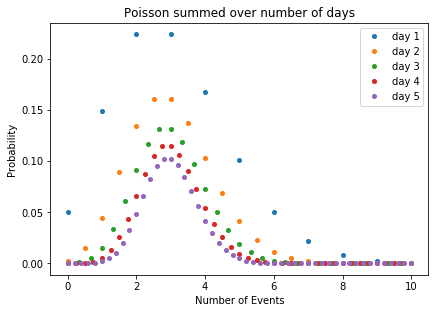

In [63]:
plt.subplots_adjust(top=1,right=1)
x1 = np.linspace(0,10,11)
probs = stats.poisson.pmf(x1, 3)
plt.plot(x1, probs, 'o', label='day 1',markersize =4)

cc = np.convolve(probs,probs)
x2 = np.linspace(0,20,21)
plt.plot(x2/2,cc, 'o', label = 'day 2', markersize =4)

conv2 = np.convolve(cc,probs)
x3 = np.linspace(0,30,31)
plt.plot(x3/3,conv2,'o', label = 'day 3', markersize =4)

conv3 = np.convolve(conv2,probs)
x4 = np.linspace(0,40,41)
plt.plot(x4/4,conv3,'o', label = 'day 4', markersize =4)

conv4 = np.convolve(conv3,probs)
x5 = np.linspace(0,50,51)
plt.plot(x5/5,conv4,'o', label = 'day 5', markersize =4)
plt.title('Poisson summed over number of days')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()

## 1.D.
For this case, events = N\*Y and in order to find the pdf for the sum of N days we need to convolve N-1 times. I picked N = 5 for this, which means our events here is $N=5$ \* $Y=4$ $=$ $20$. We have already convolved 4 times in the previous sections so we can reuse our conv4 here. Since we want the sigma at 20 events, we will need to sum to those events and then take 1 - sum to get the probability. We can then find our sigma, which is the likelihood that the background will produce an event of probability that is greater than 20.

In [85]:
sum_a = 0
for i in range(21):
    sum_a += conv4[i]
sigma = stats.norm.ppf(sum_a)
print("The sigma of our observation is {:.4f} .".format(sigma))

The sigma of our observation is 1.3833 .


## 2.A
For a skewed continuous distribtuion, I picked a Gamma Distribution with avg background emissions per interval set to 4. We cans see that the distribution changes on the plots as with increasing intervals it becomes more centered.

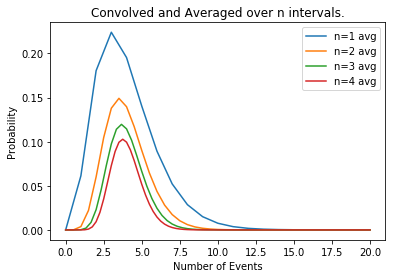

In [89]:
x = np.linspace(0,20,21)
y = stats.gamma.pdf(x,4)
plt.plot(x,y,label='n=1 avg')

y2 = np.convolve(y,y)
x2 = np.linspace(0,40,41)/2
plt.plot(x2,y2,label='n=2 avg')

y3 = np.convolve(y2,y)
x3 = np.linspace(0,60,61)/3
plt.plot(x3,y3,label='n=3 avg')

y4 = np.convolve(y3,y)
x4 = np.linspace(0,80,81)/4
plt.plot(x4,y4,label='n=4 avg')

plt.ylabel('Probability')
plt.xlabel('Number of Events')
plt.title('Convolved and Averaged over n intervals.')
plt.legend()
plt.show()

## 2. B. 
As the number of intervals increases we can see that our distribution becomes more normal, this is supported by the Central Limit Theorem. Althought we will need infinite convolutions to be completley normal. We can compare our 4 interval average with a gaussian fit to see how close they are.

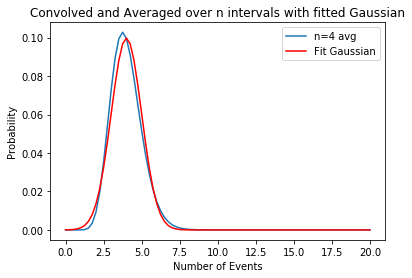

In [96]:
y4 = np.convolve(y3,y)
x4 = np.linspace(0,80,81)/4
plt.plot(x4,y4,label='n=4 avg')

gauss_fit = stats.norm.pdf(x4,4,1)
plt.plot(x4,gauss_fit/4,label='Fit Gaussian', color='red')
plt.title('Convolved and Averaged over n intervals with fitted Gaussian')

plt.ylabel('Probability')
plt.xlabel('Number of Events')
plt.legend()
plt.show()

## 3.A.

Let the background be a standard normal distribution. Let our Gaussian be centered at 0, with standard deviation = 1. Next, let the stregth Y = 4.21. Since the background represents brightness, we would be looking for a meaningful signal that is brighter than the background. We will consider bright events as more signal like, therefore, we will look for probabilities with higher sigma than our event, and then integrate down to -$\infty$.

In [106]:
# Y = 4.21 and STD = 0
std = 1
p_version1 = 1 - stats.norm.cdf(4.21, loc = 0, scale = std)
sigma_v1 = stats.norm.ppf(1 - p_version1)
print("The probability of the background producing this signal is {:.4}, and sigma is {:.4}.".format(p_version1, sigma_v1))

The probability of the background producing this signal is 1.277e-05, and sigma is 4.21.


## 3.B & C
Like in the previous part, we assume that every pixel in the has a brightness pulled from a standard normal distribution. Given that, our background is then the average of the distributions of each pixel. Here we are looking of a signal in 10,000 pixels, the question we are asking is: probability that any of the 10,000 pixels produce our signal. Or what is the probability over 10k trials that a more signal like event occurs. We note that in the tails of the distribution, this convolution will approximately be equal to, after normalization, multiplication of the base distribution by 10,000. We can approximate this by taking 10000 times our previous probability. Then we can use the same methods to calculate sigma as above.

In [107]:
p_version2 = 10000 * p_version1
sigma_v2 = stats.norm.ppf(1 - p_version2)
print("The significance is {} sigma for this event.".format(sigma_v2))

The significance is 1.1374010028113704 sigma for this event.


## 4.A.
Since out BG was chosen to be normally distributed, a 5 sigma result translates to 5 units stronger than the average.

In [109]:
pbg = 1 - stats.norm.cdf(5)
sig1 = stats.norm.ppf(1 - pbg, loc = 0, scale=std)
print("We need a signal of magnitude at least {}.".format(str(sig1)))

We need a signal of magnitude at least 4.999999999970176.


## 4.B.
In version 2, if we have a signal with a 5 sigma p value then for version 1 it should follow that the p value will be 10000 times smaller.

In [112]:
pbg2 = pbg/ 10000
sig2 = stats.norm.ppf(1 - pbg2, loc = 0, scale=std)
print("We need a signal of magnitude at least {} for Version 2.".format(sig2))

We need a signal of magnitude at least 6.550537486891655 for Version 2.


## 4.C.
The increase in brightness of the 5 sigma signal is not that big, it works out to around a 33% increase. While 10,000 trials does increases the area contained in the tails when compared to a single trial, this region is already minute relative to the total area enclosed by the graph of the distribution. The effect of the averaging is not significant in altering the distribution.

## 4.D.

Changing by orders of magnitude still shifts the 5 sigma threshold by a small amount. If we look back and see that changing from 1 trials to 10,000 trials (4 orders of magnitude) only changed the threshold by 33%. This will grow very slowly as we increase the number of trials.